# Самостоятельная работа. Вариант 4
## Дисциплина "Машинное обучение". Тема "Предобработка данных"

### 1.1 Загрузите набор данных в DataFrame из файла [customersCount.csv](https://drive.google.com/file/d/1dxVOP9qqSnx5DeyPd7NIuw8z7ISwN0_J/view?usp=sharing). В качестве индекса используйте столбец StatusDate. Набор данных содержит информацию о количестве покупателей, совершавших покупки в некоторые даты на торговых площадках компании в разных городах. (0,5 балла)

In [56]:
import pandas as pd
import math
import numpy as np

In [119]:
df = pd.read_csv('data/customersCount.csv')

In [120]:
df['StatusDate'] = pd.to_datetime(df['StatusDate'])
df['month'] = df['StatusDate'].dt.month
df.set_index('StatusDate', inplace=True)

### 1.2 Выведите 10 последних строк набора данных. (0,5 балла)


In [12]:
df.tail(10)

,City,Status,CustomerCount
StatusDate,,,
2016-10-24,SAINT-PETERSBURG,3,401
2016-10-31,Samara,1,591
2016-11-07,Samara,2,390
2016-11-14,PERM,2,312
2016-11-21,Moskow,2,311
2016-11-28,moskow,3,777
2016-12-05,moskow,3,425
2016-12-12,Samara,1,622
2016-12-19,Penza,3,29


### 1.3 Выведите те строки таблицы в которых упоминались города "Perm" и "Samara". Обратите внимание, что для некоторых городов название записано в разном регистре. Приведите все названия города к верхнему регистру.  В таблице должны быть отражены все поля, которые есть в исходной таблице. (1 балл)


In [107]:
df.City = df.City.apply(lambda x: str(x).upper())

In [15]:
df.City.unique()

array(['PERM', 'SAINT-PETERSBURG', 'MOSKOW', 'SAMARA', 'PENZA'],
      dtype=object)

In [16]:
df[(df.City == 'PERM') | (df.City == 'SAMARA')]

,City,Status,CustomerCount
StatusDate,,,
2009-01-05,PERM,1,877
2009-02-02,SAMARA,1,300
2009-02-09,SAMARA,1,706
2009-02-16,PERM,2,347
2009-02-23,SAMARA,1,143
...,...,...,...
2016-10-17,PERM,1,905
2016-10-31,SAMARA,1,591
2016-11-07,SAMARA,2,390


### 1.4 Определите количество различных значений, которые встречались в столбце Status, выведите их. (1 балл)


In [17]:
df.Status.value_counts()

2    150
1    140
3    127
Name: Status, dtype: int64

### 1.5 Постройте столбировую диаграмму, на которой отобразите количество записей в наборе данных для каждого статуса. У диаграммы должен быть заголовок и подписи осей, столбцы диаграммы должны быть подписаны числом (количество записей). (1 балл)

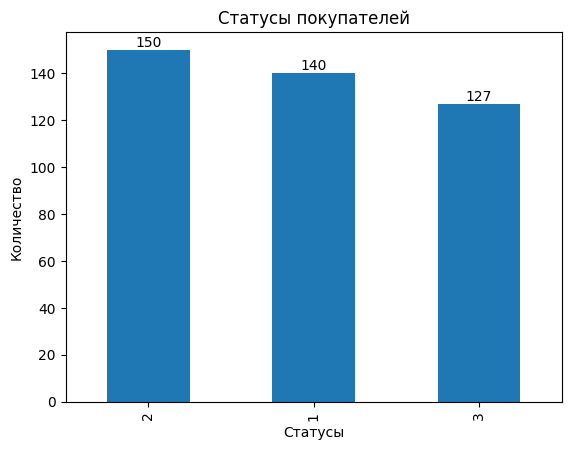

In [25]:
ax = df.Status.value_counts().plot(kind='bar', title='Статусы покупателей',\
                                   xlabel='Статусы', ylabel='Количество');
ax.bar_label(ax.containers[0]);

### 1.6 Сформируйте двумерный Numpy-массив со сводной информацией о покупателях в зависмости от статуса. Столбцы должны соответствовать различным городам. Элементы таблицы должны хранить суммарное количество покупателей  (т.е. значения поля CustomerCount нужно суммировать!) в зависимости от условия строки таблицы при заданном городе.

*   Условие первой строки таблицы: рассматриваем те строки иcходного набора данных, где CustonerCount не превышало 100. 
*   Для второй строки: CustonerCount больше 100, и не превышает 200.
*   Для третьей строки: CustonerCount больше 200, и не превышает 300.
*   И так далее, каждая строка берет очередную сотню.

(2 балла)




In [74]:
max_value = df.CustomerCount.sort_values(ascending=False).iloc[0]
step = 100
steps_cnt = math.ceil(max_value/step)
cities = list(df.City.unique())
arr = np.zeros((steps_cnt, len(cities)), int)
for i in range(steps_cnt):
    arr[i] = [df[(df.City == city) &
                 (df.CustomerCount >= i*step) &
                 (df.CustomerCount < i*step + step)].CustomerCount.sum()
              for city in cities]

In [75]:
arr

array([[  438,   522,   482,   301,   404],
       [ 1678,  1477,  2259,   909,   964],
       [ 2019,  1895,  2649,   817,  1247],
       [ 3480,  3383,  5223,  2003,   309],
       [ 4508,  4849,  5823,   868,   404],
       [ 3918,  6658,  9256,  6017,   529],
       [11142,  2463,  5254,  6466,  3231],
       [ 6663,  9713, 15751,  3016,  4472],
       [ 6864,  9436, 16474,  2532,  1722],
       [ 7604,  5657,  8629,  3835,  7663]])

### 1.7 Проверьте правильность значений, полученных в предыдущем пункте. Посчитайте сумму значений поля CustomerCount для каждого города. Кроме того, посчитайте сумму по столбцам построенного Numpy-массива. В обоих случаях должны получиться одни и те же значения. (1 балл)

In [86]:
for idx, city in enumerate(cities):
    print(city)
    print(df[df.City == city].CustomerCount.sum())
    print(np.sum(arr, axis=0)[idx])

PERM
48314
48314
SAINT-PETERSBURG
46053
46053
MOSKOW
71800
71800
SAMARA
26764
26764
PENZA
20945
20945


### 1.8 Постройте круговую диаграмму, в которой отразите суммарное количество покупателей для каждого города (используйте данные, полученные на предыдущем шаге). У диаграммы должен быть заголовок и подписи в виде процентного отношения. (1 балл)

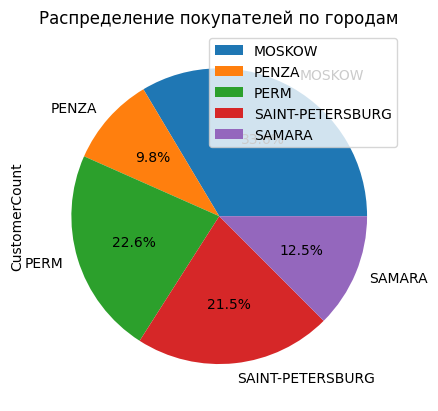

In [101]:
df.groupby('City').agg({'CustomerCount': 'sum'}).plot.pie(y='CustomerCount',\
                                                                          title='Распределение покупателей по городам',\
                                                                          autopct='%1.1f%%');

### 1.9 Определите сколько записей исходного набора данных для каждого месяца (вне зависимости от года) имеется в таблице. (1 балл)

In [121]:
df.month.value_counts()

8     37
3     36
5     35
6     35
10    35
11    35
12    35
1     34
4     34
7     34
9     34
2     33
Name: month, dtype: int64

###1.10 Постройте диаграмму, на которой будут только точки. По оси Х откладывайте номера месяцев в порядке возрастания. Отразите два ряда данных: минимальное значение поля CustomerCount и максимальное значение этого же поля. У диаграммы должен быть заголовок, легенда и подписи осей.  (1 балл)

In [ ]:
# ваш ответ здесь